In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

work_dir = 'C:\\Users\\banda\\Downloads\\105_classes_pins_dataset'


<ipython-input-12-1fd83dcf0f83>:37: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  fig.add_subplot(np.sqrt(images.shape[0]), np.sqrt(images.shape[0]), i+1)


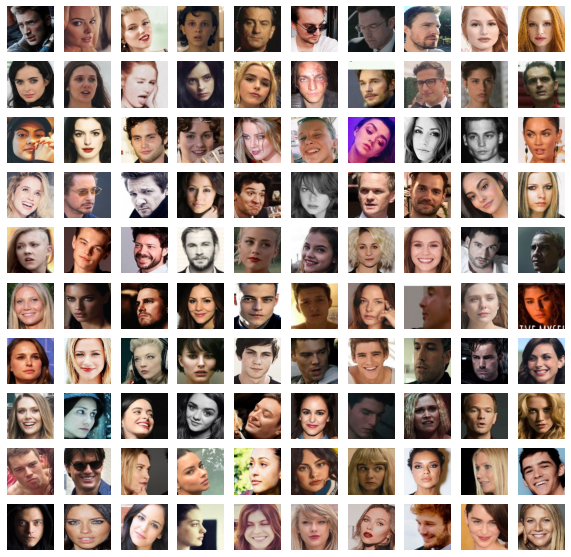

In [12]:




def get_all_paths():
    paths = []

    for dir_n in os.listdir(work_dir):
        for ip in os.listdir(os.path.join(work_dir, dir_n)):
            img_p = os.path.join(work_dir, dir_n, ip)

            paths.append(img_p)

    return np.array(paths)


def choose_random_paths(paths, n: int = 3):
    return np.random.choice(paths, n)


def load_image(path, size2reshape: tuple = None, gray: bool = False, make_rgb: bool = True):
    img = cv2.imread(path)

    if size2reshape is not None:
        img = cv2.resize(img, size2reshape)

    if gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if make_rgb:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    return img


def show_images(n_paths):
    images = np.array([load_image(q, (100, 100), False, True) for q in n_paths])

    fig = plt.figure(figsize=(np.sqrt(images.shape[0]), np.sqrt(images.shape[0])))
    for i, img in enumerate(images):
        fig.add_subplot(np.sqrt(images.shape[0]), np.sqrt(images.shape[0]), i+1)
        plt.axis("off")
        plt.imshow(img)

    plt.savefig("fig.png")
    plt.show()

    return True


if __name__ == '__main__':
    all_paths = get_all_paths()
    r_paths = choose_random_paths(all_paths, n=100)

    show_images(r_paths)